In [151]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image

In [152]:
fname="../samples/pika.jpg"
N_cols=5
class FirstFlag:
    def __init__(self):
        self.flag = True
    def __call__(self):
        if self.flag:
            self.flag = False
            return True
        else:
            return False
flag=FirstFlag()

In [153]:
col_li=[
[255,255,255],[79, 195, 247],[99, 215, 255],[229, 115, 115],[240, 98, 146],[40,60,60],[200,30,0],
[255, 255, 0],[129, 199, 132],[121, 134, 203],[186, 104, 200],[149, 117, 205],[121, 134, 203],[77, 208, 225],[77, 182, 172],
[120,120,120],[50,100,200],[120,255,50],[10,10,10],[30,30,255]
]

hex_df=rgbdf2hexdf(pd.DataFrame(col_li))
rgbv=pd.DataFrame(rgbvalue(col_li,hex_df))

--------------------------------------------------------------------------------
                         rgb2hex completed successfully                         
--------------------------------------------------------------------------------


関数とか諸々

In [154]:
def decopri(txt):
    print("-"*80)
    if len(str(txt))<80:
        print(" "*int((80-len(str(txt)))/2)+str(txt)+" "*int((80-len(str(txt)))/2))
    else:
        print(str(txt))
    print("-" * 80)
    
def rgb2hex(rgb):
    cop=rgb.copy()
    li=["a","b","c","d","e","f"]
    hex="#"
    for i in range(3):
        if cop[i]/16>=10:
            hex+=li[int(cop[i]/16)-10]
            cop[i]%=16
        else:
            hex+=str(int(cop[i]/16))
            cop[i]%=16
        if cop[i]>=10:
            hex+=li[cop[i]-10]
        else:
            hex+=str(cop[i])
    return hex

def img2df(input_img):
    im_ar=np.asarray(input_img)
    x,y,z=im_ar.shape[0],im_ar.shape[1],im_ar.shape[2]
    df=(pd.DataFrame(im_ar.reshape([x*y,z]))).rename(columns={0:"r",1:"g",2:"b"})
    decopri("img２df completed successfully")
    return df,x,y,z

def color_grouping(df,N):
    pred = KMeans(n_clusters=N).fit_predict(np.array(df))
    df["group"]=pred
    decopri("color_grouping completed successfully")
    return df
def coltable(df,N):
    col_df=[]
    for i in range(N):
        data_len=len(df[df["group"]==i])
        rgb=[]
        for j in range(3):
            vc=df[df["group"]==i][cols[j]].value_counts()
            if np.array(vc.head(1))[0]/data_len>=0.5:
                rgb.append(vc.keys()[0])
            else :
                rgb.append(int(df[df["group"]==i][cols[j]].mean()))
#         col_df.append(rgb2hex(rgb))
        col_df.append(rgb)
    decopri("coltable completed successfully")
    col_df=pd.DataFrame(col_df)
    return col_df
            
def rgbdf2hexdf(rgb_df):
    hexli=[]
    for i in range(len(rgb_df)):
        hexli.append( rgb2hex(rgb_df.loc[i]))
    decopri("rgb2hex completed successfully")
    return pd.DataFrame(hexli)

def rgbvalue(li,df):
    rgbv=[]
    for i in range(len(li)):
        rgbvalue="("
        for j in range(3):
            rgbvalue+=str(li[i][j])
            if j!=2:
                rgbvalue+=","
        rgbvalue+=")"
        rgbvalue+="  "*3+df.loc[i]
        rgbv.append(rgbvalue)
    return rgbv

In [155]:
img=Image.open(fname)
cols=["r","g","b"]
img_df,x,y,z=img2df(img)
if flag():
    img_df=color_grouping(img_df,N_cols)    
    col_df=coltable(img_df,N_cols)
    hex_ori_df=rgbdf2hexdf(col_df)
else :
    decopri("color_grouping skipped")

--------------------------------------------------------------------------------
                         img２df completed successfully                         
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                     color_grouping completed successfully                     
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                        coltable completed successfully                        
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                         rgb2hex completed successfully                         
--------------------------------------------------------------------------------


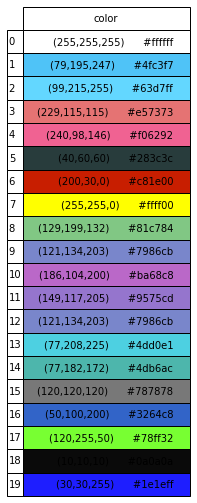

In [156]:
fig,ax = plt.subplots(figsize=((len(col_df.columns))*1, (len(col_df))*1.8))
ax.axis("off")
tbl = ax.table(cellText=rgbv.values,bbox=[0,0,1,1],colLabels=["color"],rowLabels=hex_df.index,  cellColours=hex_df.values)

In [169]:
c=[10,0,1,2,4]
hex_edit=[]
for i in range(N_cols):
    hex_edit.append(rgb2hex(col_li[c[i]]))
hex_edit=pd.DataFrame(hex_edit)
img_edit_df=img_df
for g in range(N_cols):
    for j in range(3):
            img_edit_df.loc[img_df["group"]==g,cols[j]]=col_li[c[g]][j]

In [170]:
img_edit_df=img_edit_df.drop(columns={"group"})
img_edit=np.array(img_edit_df).reshape([x,y,z])

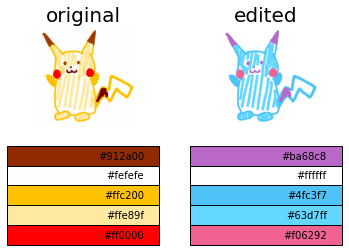

In [175]:

fig = plt.figure()

X = 2
Y = 2
imgplot = 1
ax1 = fig.add_subplot(X, Y, 1)
ax1.set_title("original",fontsize=20)
ax1.axis('off')
plt.imshow(np.array(img))

img2plot =  2
ax2 = fig.add_subplot(X, Y, img2plot)
ax2.axis('off')
ax2.set_title("edited",fontsize=20)
plt.imshow(img_edit)

ax3=fig.add_subplot(X, Y, 3)
tbl = ax3.table(cellText=hex_ori_df.values,bbox=[0,0,1,1],colLabels=None,rowLabels=None,  cellColours=hex_ori_df.values)
ax3.axis('off')

ax4=fig.add_subplot(X, Y, 4)
tbl = ax4.table(cellText=hex_edit.values,bbox=[0,0,1,1],colLabels=None,rowLabels=None,  cellColours=hex_edit.values)
ax4.axis('off')

# plt.show()
plt.savefig("../output/pikatable1.jpg")

In [171]:
# fig = plt.figure()
# ax=fig.add_subplot(1,1,1)
# ax.axis("off")
# plt.imshow(img_edit)
# plt.savefig("../output/doku_pika.jpg")